In [15]:
pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import nibabel as nib
from nilearn import image, input_data
from scipy import stats
import networkx as nx
import community
import matplotlib.pyplot as plt



graph_attributes = np.empty((0, 7))

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\nilearn\__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\nilearn\input_data\__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
import os
import numpy as np
import networkx as nx        
import glob
import nibabel as nib

# Define the folder path where the .nii files are located
folder_path = "nifti_files"

# Use glob to get a list of .nii files in the folder
nii_files = glob.glob(folder_path + "/*.nii.gz")

# Iterate over the .nii files and read them using nibabel
for nii_file in nii_files:
    try:
          # Extract the patient ID from the file name
        patient_id = nii_file.split(".")[0]
        
        # Check if the file represents a disorder group or control group
        is_disorder = "_1" in nii_file
        # Load the NIfTI image
        image = nib.load(nii_file)

           # Process the image and calculate graph attributes
        partial_correlation_matrix = partial_corr(image)
        weight_adjacency_matrix = threshold(partial_correlation_matrix)        
        # Create a graph using the weight adjacency matrix
        graph = nx.from_numpy_array(weight_adjacency_matrix)
        
        # Store the graph and other relevant information in a dictionary
        graph_data = {
            "patient_id": patient_id,
            "is_disorder": is_disorder,
            "graph": graph,
            "weight_adjacency_matrix": weight_adjacency_matrix
        }
        print(patient_id, "added")
        # Append the graph data to the list
        graph_data_list.append(graph_data)

    except Exception as e:
        print(f"Error loading file: {nii_file}")
        print(e)


In [3]:
import os
import numpy as np

folder_path = "nifti_files"  # Path to the folder containing the embedding files
embedding_dimension = 32  # Embedding dimension size

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter files with the naming convention "patient_id_node2vec_embeddings"
embedding_files = [file for file in file_list if "_node2vec_embeddings" in file]

# Initialize an empty matrix to store the embeddings
embedding_matrix = np.zeros((len(embedding_files), embedding_dimension))

# Iterate over each embedding file
for i, file in enumerate(embedding_files):
    file_path = os.path.join(folder_path, file)
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Extract the embedding vectors (excluding the first line)
    embedding_vectors = []
    for line in lines[1:]:
        vector = list(map(float, line.split()[1:]))
        embedding_vectors.append(vector)
    
    # Calculate the average embedding vector
    average_embedding = np.mean(embedding_vectors, axis=0)
    
    # Store the average embedding vector in the embedding matrix
    embedding_matrix[i] = average_embedding


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Example classifier, replace with your desired algorithm

labels = np.array([0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0])  # Example labels, replace with your actual labels

X_train, X_test, y_train, y_test = train_test_split(embedding_matrix, labels, test_size=0.2, random_state=42)


classifier = SVC()  # Initialize the classifier
classifier.fit(X_train, y_train)  # Train the model on the training data
accuracy = classifier.score(X_test, y_test)  # Calculate the accuracy on the test set
print("Accuracy:", accuracy)


Accuracy: 0.7777777777777778


C:\Users\User\AppData\Roaming\Python\Python37\site-packages\joblib\memory.py:349: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


In [51]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

folder_path = "nifti_files"  # Path to the folder containing the embedding files
embedding_dimension = 32  # Embedding dimension size

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter files with the naming convention "patient_id_node2vec_embeddings"
embedding_files = [file for file in file_list if "node2vec_embeddings" in file]

# Initialize an empty matrix to store the embeddings
embedding_matrix = np.zeros((len(embedding_files), embedding_dimension))
labels = []

# Iterate over each embedding file
for i, file in enumerate(embedding_files):
    file_path = os.path.join(folder_path, file)
    
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Extract the class label from the file name
    if "_1_" in file:
        class_label = 1
    else:
        class_label = 0
    
    labels.append(class_label)
    
    # Extract the embedding vectors (excluding the first line)
    embedding_vectors = []
    for line in lines[1:]:
        vector = list(map(float, line.split()[1:]))
        embedding_vectors.append(vector)
    
    # Calculate the average embedding vector
    average_embedding = np.mean(embedding_vectors, axis=0)
    
    # Store the average embedding vector in the embedding matrix
    embedding_matrix[i] = average_embedding



In [48]:
#For one embedding
import numpy as np

# File path of the embedding file
file_path = "nifti_files/Pitt_0050005.nii.gz_1_node2vec_embeddings.txt"

# Embedding dimension size
embedding_dimension = 32

# Initialize an empty matrix to store the embeddings
embedding_matrix = np.zeros((1, embedding_dimension))

# Class label for this file (you can set it based on your information)
class_label = 1

# Read the embedding file
with open(file_path, 'r') as f:
    lines = f.readlines()

# Extract the embedding vectors (excluding the first line)
embedding_vectors = []
for line in lines[1:]:
    vector = list(map(float, line.split()[1:]))
    embedding_vectors.append(vector)

# Calculate the average embedding vector
average_embedding = np.mean(embedding_vectors, axis=0)

# Store the average embedding vector in the embedding matrix
embedding_matrix[0] = average_embedding

# Label for this embedding (you can set it based on your information)
labels = [class_label]

print("Embedding Matrix:")
print(embedding_matrix)
print("Labels:")
print(labels)
 

Embedding Matrix:
[[ 0.11322271 -0.04584533 -0.06560419 -0.01808286  0.09195845 -0.18191984
   0.13754171 -0.04929813 -0.26371605 -0.12592618  0.07323804 -0.45124583
  -0.1446457  -0.23483726  0.12626344  0.03403269  0.15605712  0.27752671
  -0.01227676  0.21858441  0.16146388  0.32282252  0.32358599 -0.16571377
   0.05684033 -0.13162977 -0.21849905  0.33225322  0.1674742  -0.21703089
  -0.07442901  0.03224786]]
Labels:
[1]


In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Perform oversampling on the embedding matrix and labels
oversampler = RandomOverSampler()
embedding_matrix_resampled, labels_resampled = oversampler.fit_resample(embedding_matrix, labels)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(embedding_matrix_resampled, labels_resampled, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = SVC()

# Train the model on the training data
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)


# Create the predicted edge list
predicted_edge_list = []
for i, y in enumerate(y_pred):
    if y == 1:
        source_node = i  # Assuming that the node indices correspond to the row index in the embedding_matrix
        for j, true_y in enumerate(y_test):
            if true_y == 1 and j != i:
                target_node = j
                predicted_edge_list.append((source_node, target_node, 1.0))  # Use a constant weight of 1.0 for predicted edges

true_network_graph = nx.from_numpy_array(threshold_matrix)
# Compute the Mean Average Precision (MAP)
map_val = computeMAP(predicted_edge_list, true_network_graph)  # Replace 'true_network_graph' with the actual network graph object

print("MAP:", map_val)


Precision: 0.5
Recall: 0.42857142857142855
F1-score: 0.4615384615384615
ROC-AUC score: 0.4642857142857143
Name: 
Type: DiGraph
Number of nodes: 246
Number of edges: 9410
Average in degree:  38.2520
Average out degree:  38.2520
MAP: 0.009574622531939607


In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def evaluateNodeClassification(X, Y, test_ratio):
    """This function is used to evaluate node classification.
        Args:
            X (numpy array) : Embedding values of the nodes.
            Y (numpy array) : Labels of the nodes.
            test_ratio (float): Ratio to split the training and testing nodes.
        Returns:
            Tuple: Micro and macro F1 scores.
    """
    # Perform oversampling on the embedding matrix and labels
    oversampler = RandomOverSampler()
    X_resampled, Y_resampled = oversampler.fit_resample(X, Y)

    # Split the resampled data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=test_ratio, random_state=42)

    # Initialize the classifier
    classifier = SVC()

    # Train the model on the training data
    classifier.fit(X_train, Y_train)

    # Predict the labels for the test set
    Y_pred = classifier.predict(X_test)

    # Calculate micro and macro F1-score
    micro_f1 = f1_score(Y_test, Y_pred, average='micro')
    macro_f1 = f1_score(Y_test, Y_pred, average='macro')

    return micro_f1, macro_f1

# Usage example:
# Assuming you have X (embedding_matrix_resampled) and Y (labels_resampled) from your previous code
test_ratio = 0.2
micro_f1, macro_f1 = evaluateNodeClassification(X_train, y_train, test_ratio)
print("Micro F1-score:", micro_f1)
print("Macro F1-score:", macro_f1)


Micro F1-score: 0.7
Macro F1-score: 0.696969696969697


In [18]:
import glob
import nibabel as nib

# Define the folder path where the .nii files are located
folder_path = "nifti_files"

# Use glob to get a list of .nii files in the folder
nii_files = glob.glob(folder_path + "/*.nii.gz")

# Iterate over the .nii files and read them using nibabel
for nii_file in nii_files:
    try:
        # Load the NIfTI image
        image = nib.load(nii_file)

        # Process the image and calculate graph attributes
        partial_correlation_matrix = partial_corr(image)
        threshold_matrix = threshold(partial_correlation_matrix)
        graph_attr = graph_attributesfunc(threshold_matrix)
        communities_neki = communitiesnum(threshold_matrix)
        graph_attr.append(communities_neki)
        graph_attr.append(nii_file)
        graph_attributes = np.append(graph_attributes, [graph_attr], axis=0)
        embedding_modelar = embedding_model(threshold_matrix, nii_file)
        print(graph_attr, "added")

    except Exception as e:
        print(f"Error loading file: {nii_file}")
        print(e)

In [2]:
def partial_corr(image_file):
    # Load the atlas image
    atlas_file = 'BN_Atlas_246_1mm.nii.gz'  # Replace with your atlas file
    atlas_data = nib.load(atlas_file).get_fdata()

    # Create a masker to extract ROI signals
    masker = input_data.NiftiLabelsMasker(labels_img=atlas_file, standardize=True)

    # Extract ROI signals from the image data
    roi_signals = masker.fit_transform(image_file)
    # Compute the partial correlation matrix
    partial_corr_matrix = np.zeros((len(roi_signals.T), len(roi_signals.T)))
    for i in range(len(roi_signals.T)):
        for j in range(i+1, len(roi_signals.T)):
            # Calculate the partial correlation coefficient
            r_partial, _ = stats.pearsonr(roi_signals.T[i], roi_signals.T[j])

            # Perform Fisher transformation to convert to a z-score
            z_partial = 0.5 * np.log((1 + r_partial) / (1 - r_partial))

            # Calculate the p-value
            p_value = 2 * stats.norm.cdf(-np.abs(z_partial))

            # Store the partial correlation coefficient in the matrix
            partial_corr_matrix[i, j] = r_partial
            partial_corr_matrix[j, i] = r_partial
    return partial_corr_matrix

# The partial correlation matrix will have shape (n_ROIs, n_ROIs)


In [3]:
def threshold(partial_corr_matrix):
    # Thresholding parameters
    mean = np.mean(partial_corr_matrix)
    std = np.std(partial_corr_matrix)
    # Set the threshold value as a multiple of the standard deviation
    threshold_value2 = mean + std
    threshold_value1 = 4.0 # Set the threshold value as per your requirement
    # Thresholding the correlation matrix
    adjacency_matrix = np.where(np.abs(partial_corr_matrix) >= threshold_value2, 1, 0)  # Binary adjacency matrix
    weighted_adjacency_matrix = np.where(np.abs(partial_corr_matrix) >= threshold_value2, np.abs(partial_corr_matrix), 0)  # Weighted adjacency matrix
    return weighted_adjacency_matrix


In [11]:
def  graphmod(weighted_adjacency_matrix):
    graph = nx.from_numpy_array(weighted_adjacency_matrix)
    return graph 

In [12]:
def graph_attributesfunc(weighted_adjacency_matrix):
    # Create a graph from the weighted adjacency matrix
    graph = nx.from_numpy_array(weighted_adjacency_matrix)

    # Optional: Set the labels of the nodes if available
    node_labels = range(weighted_adjacency_matrix.shape[0])  # Assuming each row/column represents a node
    labels = {i: label for i, label in enumerate(node_labels)}
    nx.set_node_attributes(graph, labels, 'label')
    # Optional: Set the edge weights as attributes
    edge_weights = {(u, v): weight for (u, v, weight) in graph.edges(data='weight')}
    nx.set_edge_attributes(graph, edge_weights, 'weight')
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()

    # Calculate the average degree
    avg_degree = sum(dict(graph.degree()).values()) / num_nodes

    # Calculate the largest connected component (LCC)
    lcc = max(nx.connected_components(graph), key=len)
    lcc_percentage = len(lcc) / num_nodes * 100
    # Calculate the clustering coefficient
    avg_clustering = nx.average_clustering(graph)
    return [num_nodes, num_edges, avg_degree, lcc_percentage, avg_clustering]
    


In [13]:
def communitiesnum(weighted_adjacency_matrix):
    graph = nx.from_numpy_array(weighted_adjacency_matrix)
    # Perform community detection using the Louvain algorithm
    partition = community.best_partition(graph)

    # Create a dictionary of nodes and their corresponding community IDs
    communities = {}
    for node, comm_id in partition.items():
        communities[node] = comm_id

    # Create a subgraph for each community
    community_subgraphs = []
    for community_id in set(communities.values()):
        nodes_in_community = [node for node, comm_id in communities.items() if comm_id == community_id]
        community_subgraph = graph.subgraph(nodes_in_community)
        community_subgraphs.append(community_subgraph)  
    print(len(community_subgraphs))
    return len(community_subgraphs)

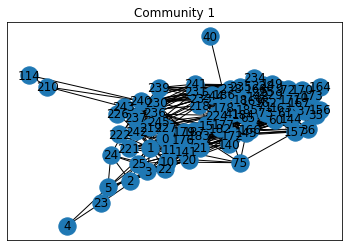

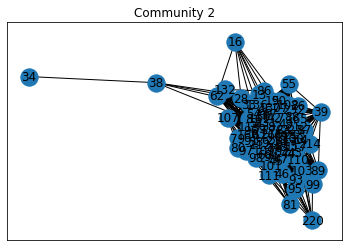

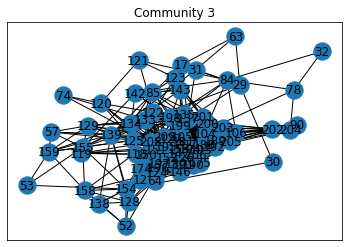

In [12]:



# Visualize each community subgraph
for i, subgraph in enumerate(community_subgraphs):
    pos = nx.spring_layout(subgraph)  # Layout for node positions
    nx.draw_networkx(subgraph, pos)
    plt.title(f"Community {i+1}")
    plt.show()

In [16]:
from nodevectors import Node2Vec

In [31]:
# Fit embedding model to graph
g2v = Node2Vec(
    n_components=32,
    walklen=10
)



In [34]:
print(type(graph))

<class 'networkx.classes.graph.Graph'>


In [35]:
# Convert the edge weights to object data type
edge_weights = {(u, v): float(weight) for u, v, weight in graph.edges(data='weight')}
nx.set_edge_attributes(graph, edge_weights, 'weight')

In [15]:
from node2vec import Node2Vec


In [14]:
def embedding_model(weighted_adjacency_matrix, nii_file):
    # Create a graph from the weighted adjacency matrix
    graph = nx.from_numpy_array(weighted_adjacency_matrix)
    # Preprocess the graph for node2vec
    node2vec = Node2Vec(graph, dimensions=32, walk_length=10, num_walks=200, p=1, q=1)
    # Generate walks
    walks = node2vec.walks
    # Train the node2vec model on the walks
    model = node2vec.fit(window=5, min_count=1, batch_words=4)
    # Get the embeddings for all nodes
    embeddings = {str(node): model.wv[str(node)] for node in graph.nodes}
    # Query embeddings for node 42
    embedding_42 = embeddings[str(42)]
    filename = str(nii_file) + '_node2vec_embeddings.txt'
    # Save the embeddings to a file
    model.wv.save_word2vec_format(filename)


In [47]:
# Obtain the node labels (optional)
node_labels = nx.get_node_attributes(graph, 'label')

# Prepare the data for t-SNE
embedding_matrix = np.array(list(embeddings.values()))
labels = [node_labels[node] if node in node_labels else str(node) for node in embeddings.keys()]




In [48]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedded_points = tsne.fit_transform(embedding_matrix)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


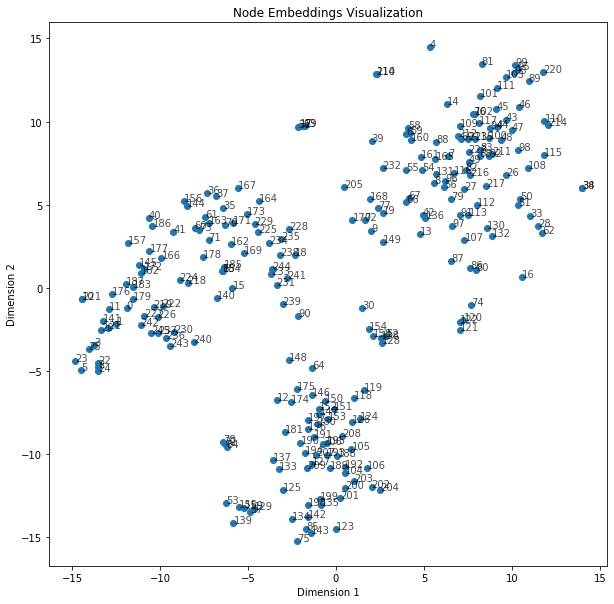

In [49]:
# Plot the embedded points
plt.figure(figsize=(10, 10))
plt.scatter(embedded_points[:, 0], embedded_points[:, 1])
for i, label in enumerate(labels):
    plt.annotate(label, (embedded_points[i, 0], embedded_points[i, 1]), alpha=0.7)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Node Embeddings Visualization')
plt.show()

In [25]:
import glob
import nibabel as nib

average_vecs = []
# Define the folder path where the .nii files are located
folder_path = "nifti_files"

# Use glob to get a list of .nii files in the folder
txt_files = glob.glob(folder_path + "/*.txt")






In [26]:
# Iterate over the .nii files and read them using nibabel
for txt_file in txt_files:
    try:
        with open(txt_file, 'r') as file:
            lines = file.readlines()
        num_vectors = int(lines[0].split()[0])
        dimension = int(lines[0].split()[1])
        total_vector = [0] * dimension

        for line in lines[1:]:
            vector = list(map(float, line.split()[1:]))
            total_vector = [total_vector[i] + vector[i] for i in range(dimension)]

        average_vector = [total_vector[i] / num_vectors for i in range(dimension)]
        average_vecs.append(average_vector)
    except Exception as e:
        print(f"Error loading file: {nii_file}")
        print(e)

In [27]:
import numpy as np
from node2vec import Node2Vec

In [28]:
average_vectors = np.concatenate(average_vecs, axis=0)

In [29]:
graph = nx.Graph()
num_graphs = len(average_vecs)
num_nodes_per_graph = len(average_vecs[0])

for i in range(num_graphs):
    for j in range(num_nodes_per_graph):
        node_id = i * num_nodes_per_graph + j
        graph.add_node(node_id, features=average_vectors[node_id])


In [30]:
# Create an instance of Node2Vec with appropriate parameters
node2vec = Node2Vec(graph, dimensions=32, walk_length=30, num_walks=200)

# Generate the node embeddings
embeddings = node2vec.fit(window=10, min_count=1)


Generating walks (CPU: 1): 100%|██████████| 200/200 [00:01<00:00, 199.12it/s]


In [31]:
# Create an instance of Node2Vec with appropriate parameters
node2vec = Node2Vec(graph, dimensions=32, walk_length=30, num_walks=200)

# Generate the node embeddings
embeddings = node2vec.fit(window=10, min_count=1)


Generating walks (CPU: 1): 100%|██████████| 200/200 [00:00<00:00, 212.20it/s]


In [32]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


C:\Users\User\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


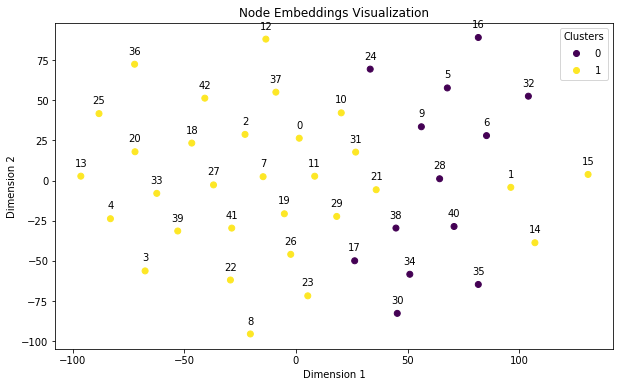

In [33]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have the average vectors stored in the 'average_vecs' variable

# Convert the average vectors to a numpy array
embeddings_array = np.array(average_vecs)

# Apply clustering algorithm (e.g., K-means) to group the vectors
num_clusters = 2  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_array)

# Reduce the dimensionality of the embeddings to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_array)

# Create a scatter plot of the 2D embeddings with colored clusters and row number annotations
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Node Embeddings Visualization')

# Add text annotations for row numbers
for i, label in enumerate(cluster_labels):
    plt.annotate(str(i), (embeddings_2d[i, 0], embeddings_2d[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()


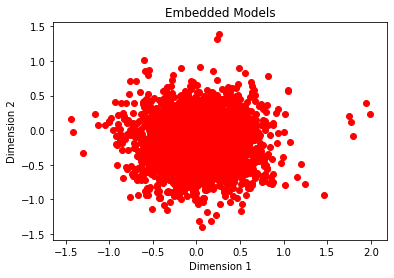

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the folder path where your .txt files are located
folder_path = 'nifti_files'

# Initialize lists to store embedded model data
embedded_models = []
groups = []

# Read the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        # Extract relevant information from the file name
        parts = file_name.split('_')
        patient_id = parts[0]
        group = 'Disorder' if '1' in parts else 'Control'
        
        # Read the contents of the file and extract the embedded model data
        with open(os.path.join(folder_path, file_name), 'r') as file:
            lines = file.readlines()
            embedded_model = np.array([list(map(float, line.split()))[1:] for line in lines[1:]])
        
        # Store the embedded model data and group information
        embedded_models.append(embedded_model)
        groups.append(group)

# Convert the lists to numpy arrays for easier manipulation
embedded_models = np.array(embedded_models)
groups = np.array(groups)

# Visualize the embedded models
for embedded_model, group in zip(embedded_models, groups):
    if group == 'Disorder':
        plt.scatter(embedded_model[:, 0], embedded_model[:, 1], c='red', label='Disorder')
    
len(embedded_models)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Embedded Models')
plt.show()


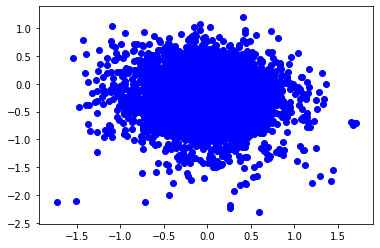

In [22]:
for embedded_model, group in zip(embedded_models, groups):
    if group != 'Disorder':
        plt.scatter(embedded_model[:, 0], embedded_model[:, 1], c='blue', label='Disorder')

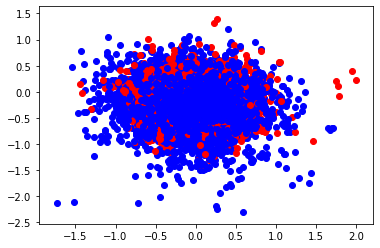

In [23]:
for embedded_model, group in zip(embedded_models, groups):
    if group == 'Disorder':
        plt.scatter(embedded_model[:, 0], embedded_model[:, 1], c='red', label='Disorder')
    else:
        plt.scatter(embedded_model[:, 0], embedded_model[:, 1], c='blue', label='Disorder')

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [35]:
folder_path = 'nifti_files'
embedded_models = []
labels = []
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        
        # Extract the label from the file name
        if '1' in filename:
            label = 'Autism'
        else:
            label = 'Control'
        
        # Read the embedded model from the .txt file
        with open(file_path, 'r') as file:
            lines = file.readlines()[1:]  # Skip the first line
            embedded_model = [[float(val) for val in line.split()[1:]] for line in lines]
        
        embedded_models.append(embedded_model)
        labels.append(label)



In [36]:
embedded_models = np.array(embedded_models)
labels = np.array(labels)


In [38]:
# Reshape the embedded_models array to 2 dimensions
embedded_models_2d = embedded_models.reshape(embedded_models.shape[0], -1)

# Reduce the dimensionality of the embeddings to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_array)



C:\Users\User\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


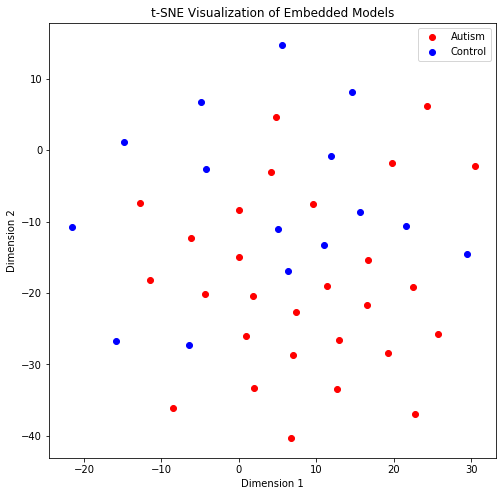

In [39]:
plt.figure(figsize=(8, 8))
colors = {'Autism': 'red', 'Control': 'blue'}
for label in np.unique(labels):
    indices = labels == label
    plt.scatter(embedded_models_tsne[indices, 0], embedded_models_tsne[indices, 1], c=colors[label], label=label)
plt.legend()
plt.title('t-SNE Visualization of Embedded Models')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


C:\Users\User\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


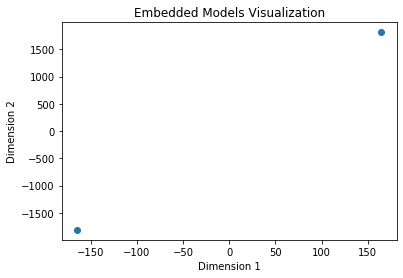

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

folder_path = "nifti_files"  # Replace with the path to your folder containing the embedding files

# Collect all the embedding files in the folder
embedding_files = [file for file in os.listdir(folder_path) if file.endswith(".txt")]

# Initialize empty lists to store the vectors for autism and not autism
autism_vectors = []
not_autism_vectors = []

# Iterate over each embedding file
for file in embedding_files:
    file_path = os.path.join(folder_path, file)
    
    # Check if the file corresponds to autism or not
    if "1" in file.split(".nii.gz")[1]:
        autism_vectors.extend(np.loadtxt(file_path, delimiter=" ", skiprows=1))
    else:
        not_autism_vectors.extend(np.loadtxt(file_path, delimiter=" ", skiprows=1))

# Convert the lists of vectors to NumPy arrays
autism_vectors = np.array(autism_vectors)
not_autism_vectors = np.array(not_autism_vectors)

# Compute the average vectors for autism and not autism
average_autism_vector = np.mean(autism_vectors, axis=0)
average_not_autism_vector = np.mean(not_autism_vectors, axis=0)

# Concatenate the average vectors
average_vectors = np.concatenate((average_autism_vector[np.newaxis, :], average_not_autism_vector[np.newaxis, :]), axis=0)

# Apply t-SNE to reduce the dimensions of the average vectors
tsne = TSNE(n_components=2, random_state=42)
embedded_models_tsne = tsne.fit_transform(average_vectors)

# Plot the embeddings
plt.scatter(embedded_models_tsne[:, 0], embedded_models_tsne[:, 1])
plt.title("Embedded Models Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
